# model load

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import IPython

import keras
from keras.models import model_from_json
from keras.optimizers import Adam

from td_utils import graph_spectrogram, make_beep_wav, output_postprocessing

from pydub import AudioSegment

c:\Users\user\anaconda3\envs\Beeeeep_2\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
model_name = './data/model/010312.json'
weight_list = './data/model/weight/010312_5.h5'

f = open(model_name, 'r')
model_json = f.read()
f.close()

model = model_from_json(model_json)

In [3]:
model.load_weights(weight_list)

opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, decay=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

# Inference

### wav to img

In [4]:
i = 99
wav = './data/test_audios/mix_{}.wav'.format(i)
true_y = np.load('./data/XY_test/y_{}.npy'.format(i))

img = graph_spectrogram(wav)
img = img.transpose()

if img.shape[0] != 1:
    img = img.reshape((1, *img.shape))

/Users/m/.pyenv/versions/pytube/lib/python3.5/site-packages/librosa/filters.py:222: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [7]:
IPython.display.Audio(wav)

### model predict

In [16]:
pred_y = model.predict(img)

### y to wav

In [11]:
pred_y_pro = output_postprocessing(pred_y, 0.65)
make_beep_wav(wav, pred_y_pro[0], 'a.wav')

In [12]:
IPython.display.Audio(wav)

In [13]:
IPython.display.Audio('a.wav')

### graph

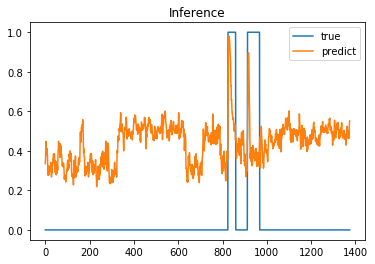

In [17]:
# pred_y = postprocessing(pred_y, 0.6)
plt.plot(true_y, label='true')
plt.plot(pred_y__pro[0], label='predict')
plt.title('Inference')
plt.legend()
plt.show()